
# Week 35

## Exercise 1 

Let $a,x\in\mathbb{R}^n$, $A\in\mathbb{R}^{n\times n}$, and **row gradients** $\tfrac{\partial f}{\partial x}\in\mathbb{R}^{1\times n}$.

**(a) Shapes.**  
- $a^\top x$ is a scalar since $(1\times n)(n\times 1)\to(1\times 1)$.  
- Therefore $\dfrac{\partial (a^\top x)}{\partial x}\in\mathbb{R}^{1\times n}$ (row).

**(b) $\displaystyle \frac{\partial (a^\top x)}{\partial x}=a^\top$.**  
Write $$f(x)=a^\top x=\sum_{i=1}^n a_i x_i$$ Then  
$\frac{\partial f}{\partial x_j}= \sum_{i=1}^n a_i \delta_{ij} =a_j$ so stacking components gives the row gradient $a^\top$.  


**(c) $\displaystyle \frac{\partial (a^\top A a)}{\partial a}=a^\top(A+A^\top)$.**  
Lets consider $g(a)=\sum_{i,j} a_i A_{ij} a_j$ Then  
$$\displaystyle \frac{\partial g}{\partial a_k}=
\frac{\partial \sum_{i,j} a_i A_{ij} a_j}{\partial a_k} = \sum_{i,j} \frac{\partial  a_i A_{ij} a_j }{\partial a_k}= 
\sum_{i,j} \delta_{ik} A_{ij} a_j + a_i A_{ij} \delta_{kj} = $$
$$\sum_j A_{kj}a_j+\sum_i a_i A_{ik}=(Aa)_k+(A^\top a)_k$$
so the row gradient is $a^\top(A+A^\top)$.  




## Exercise 2 ##

We minimize $$L(\theta)=\|y-X\theta\|_2^2=(y-X\theta)^\top (y-X\theta)$$.  
This is a convex quadratic; the stationary point is the global minimizer for the Fermat theorem.

(a) If $X$ is square and invertible and we impose $X\theta=y$, then $\theta=X^{-1}y$.

(b) More generally, set $$\nabla_\theta L=-2X^\top(y-X\theta)=0 \Rightarrow X^\top X\,\theta=X^\top y$$.  
  If $X^\top X$ invertible: $\boxed{\theta=(X^\top X)^{-1}X^\top y}$.  

(c) We can define a new vector $\boldsymbol{w=x-As}$ and rewrite the expression as $\boldsymbol{w^Tw}$ which depends on $\boldsymbol{s}$. Then we can take the partial derivative and, using the chain rule, we obtain: 
$$\frac{\partial(\boldsymbol{w}^T\boldsymbol{w})}{\partial \boldsymbol{s}}
= \boldsymbol{2w}^T\frac{\partial(\boldsymbol{w})}{\partial \boldsymbol{s}} = \boldsymbol{-2w}^T\boldsymbol{A}=\boldsymbol{-2(x-As)}^T\boldsymbol{A}$$
Where we used that $$\frac{\partial(\boldsymbol{w})}{\partial \boldsymbol{s}}=\boldsymbol{-A}$$

(d) $$
C(\boldsymbol{\theta})=\frac{1}{n}\left\{\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\theta}\right)^T\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\theta}\right)\right\}$$
 
We define the new vector $\boldsymbol{w=y-X{\theta}}$ 

Then, repeating the same steps as in (c), we obtain: 
$$\frac{\partial C(\boldsymbol{\theta})}{\partial \boldsymbol{\boldsymbol{\theta}}}=-\frac{2}{n}\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\theta}\right)^T\boldsymbol{X}$$

We set this equation equal to zero and get:
$$(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\theta})^T\boldsymbol{X}=0$$

## Exercise 3 

**(a)** Initializing and preparing data

In [1]:
import numpy as np

# Data
n = 20
income = np.array([116.,161.,167.,118.,172.,163.,179.,173.,162.,116.,101.,176.,178.,172.,143.,135.,160.,101.,149.,125.])
children = np.array([5,3,0,4,5,3,0,4,4,3,3,5,1,0,2,3,2,1,5,4])
spending = np.array([152.,141.,102.,136.,161.,129.,99.,159.,160.,107.,98.,164.,121.,93.,112.,127.,117.,69.,156.,131.])

# Feature matrix with intercept: [1, income, children]
X = np.column_stack([np.ones(n), income, children])
y = spending

**(b)** Preparing the function for the evaluation of optimal parameters 

In [2]:
def OLS_parameters(X, y):
    return np.linalg.pinv(X.T @ X) @ (X.T @ y)

beta = OLS_parameters(X, y)
y_hat = X @ beta
print("beta:", beta)

beta: [ 9.12808583  0.5119025  14.60743095]


## Exercise 4 

**(a) & (b)** Preparing data with specified seeds to ensure repetibility

In [3]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

SEED = 42
np.random.seed(SEED)
n = 100
x = np.linspace(-3, 3, n)
y = np.exp(-x**2) + 1.5*np.exp(-(x-2)**2) + np.random.normal(0, 0.1, size=n)

Preparing polynomial feature evaluation function 

In [4]:
def polynomial_features(x, p):
    x = np.asarray(x).ravel()
    X = np.zeros((len(x), p+1))
    for i in range(p+1):
        X[:, i] = x**i
    return X

Fast testo of the code with a fifth degree polynomial

In [5]:
# Fifth degree example
p = 5
X_poly = polynomial_features(x, p)
params = OLS_parameters(X_poly , y)
print("Parameters of the polynomial of fifth degree: ")
print(params)

Parameters of the polynomial of fifth degree: 
[ 0.82317631  0.30028248 -0.03303668  0.05006794 -0.00196428 -0.00891207]


**(c)** Preparation of the traning and testing data

In [6]:
# Preparing traning and test X matrixes
x_tr, x_te, y_tr, y_te = train_test_split(x, y, test_size=0.2, random_state=SEED)
Xtr, Xte = polynomial_features(x_tr, p), polynomial_features(x_te, p)

Calculating predictions and evaluating models

In [7]:
# Calculating optimal parameters
beta = OLS_parameters(Xtr, y_tr)

#Predicting and evaluating both models
y_pred_tr = Xtr @ beta
y_pred_te = Xte @ beta
mse_tr = mean_squared_error(y_tr,y_pred_tr)
mse_te = mean_squared_error(y_te,y_pred_te)
print(f"[deg={p}] Train MSE={mse_tr:.4f} | Test MSE={mse_te:.4f}")

[deg=5] Train MSE=0.0206 | Test MSE=0.0177


**(d)** Evaluating model on trainig and test data

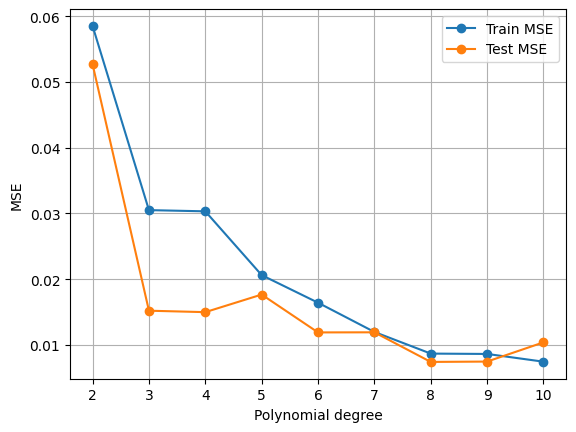

In [8]:
# Degrees from 2 to 10
deg_list = np.arange(2, 11)
mse_train, mse_test = [], []
for d in deg_list:
    Xtr, Xte = polynomial_features(x_tr, d), polynomial_features(x_te, d)
    b = OLS_parameters(Xtr, y_tr)
    mse_train.append(mean_squared_error(y_tr, Xtr @ b))
    mse_test.append(mean_squared_error(y_te, Xte @ b))

plt.figure()
plt.plot(deg_list, mse_train, marker="o", label="Train MSE")
plt.plot(deg_list, mse_test,  marker="o", label="Test MSE")
plt.grid()
plt.xlabel("Polynomial degree"); plt.ylabel("MSE"); plt.legend(); plt.show()

**(f) Brief Interpretation**

We observe that the training MSE decreases because the function we aim to approximate can be expressed as a Taylor expansion, an infinite degree polynomial. As the polynomial degree of our model increases, it becomes capable of interpolating the given data points more closely. However, since the data contains noise, a sufficiently high-degree polynomial will also start fitting this noise.

The issue arises when we use this model for prediction: it overfits the training data, leading to a higher test MSE. This problem occurs when we fit a polynomial of excessively high degree without having enough data to support such complexity.

## Excercise 5 ##

**(a)** Recalculating using sklearn function to compare results

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Compare polynomial_features
deg = 5
X_mine = polynomial_features(x, deg)
X_skl = PolynomialFeatures(degree=deg, include_bias=True).fit_transform(x.reshape(-1,1))
print(f"Difference matrix: \n{X_mine - X_skl}")
print("Norm of the difference matrix: ||X_mine - X_skl||_F =", np.linalg.norm(X_mine - X_skl))

Difference matrix: 
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -3.55271368e-15
   1.42108547e-14 -5.68434189e-14]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  3.55271368e-15
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -2.84217094e-14]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -7.10542736e-15  1.42108547e-14]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.77635684e-15
  -7.10542736e-15  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -7.

**(b)** Comaring model parameters parameters

In [10]:

# Compare OLS parameters (fit_intercept=False because bias is already in X)
Xtr = polynomial_features(x_tr, deg)
ytr = y_tr
beta_mine = OLS_parameters(Xtr, ytr)
lr = LinearRegression(fit_intercept=False).fit(Xtr, ytr)
beta_skl = lr.coef_
print(f"Difference array: \n{beta_mine - beta_skl}")
print("||beta_mine - beta_skl||_2 =", np.linalg.norm(beta_mine - beta_skl))


Difference array: 
[ 1.61093361e-13  7.54396545e-14 -8.26907987e-14 -2.34257058e-14
  8.24340596e-15  1.55431223e-15]
||beta_mine - beta_skl||_2 = 1.9773495870808514e-13


As we expected the difference is sufficiently small to be justified by floating-point numerical errors, likely due to the pseudo-inverse computation and slight variations in the underlying algorithms